Deep learning is the machine learning technique behind the most exciting capabilities in diverse areas like robotics, natural language processing, image recognition, and artificial intelligence, including the famous AlphaGo. Here I will use deep learning with Keras 2.0, the latest version of a cutting-edge library for deep learning in Python.


In [1]:
import numpy as np 

In [9]:
input_data = np.array([3, 5])

weights = {'node_0': np.array([2, 4]), 'node_1': np.array([ 4, -5]), 'output': np.array([2, 7])}

In [11]:
weights['node_0']

array([2, 4])

In [12]:
weights['node_1']

array([ 4, -5])

In [13]:
weights['output'] 

array([2, 7])

###### Coding the forward propagation algorithm

I'll write code to do forward propagation (prediction) for neural network:
 
Each data point is a customer. The first input is how many accounts they have, and the second input is how many children they have. The model will predict how many transactions the user makes in the next year. 

The input data has been pre-loaded as input_data, and the weights are available in a dictionary called weights. The array of weights for the first node in the hidden layer are in weights['node_0'], and the array of weights for the second node in the hidden layer are in weights['node_1'].

The weights feeding into the output node are available in weights['output'].


In [16]:
# Calculating node 0 value: node_0_value
node_0_value = (input_data * weights['node_0']).sum()


# Calculating node 1 value: node_1_value
node_1_value = (input_data * weights['node_1']).sum()


# Putting node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_value, node_1_value])


# Calculating output: output
output = (hidden_layer_outputs * weights['output']).sum()

# Printing output
print(output)


-39


It looks like the network generated a prediction of -39.

###### The Rectified Linear Activation Function

An "activation function" is a function applied at each node. It converts the node's input into some output.

The rectified linear activation function (called ReLU) has been shown to lead to very high-performance networks. This function takes a single number as an input, returning 0 if the input is negative, and the input if the input is positive.

Here are some examples:
relu(3) = 3
relu(-3) = 0


In [17]:
def relu(input):
    '''Define your relu activation function here'''
    # Calculating the value for the output of the relu function: output
    output = max(0, input)
    
    # Returning the value just calculated
    return(output)

# Calculating node 0 value: node_0_output
node_0_input = (input_data * weights['node_0']).sum()
node_0_output = relu(node_0_input)

# Calculating node 1 value: node_1_output
node_1_input = (input_data * weights['node_1']).sum()
node_1_output = relu(node_1_input)

# Putting node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_output, node_1_output])

# Calculating model output (do not apply relu)
model_output = (hidden_layer_outputs * weights['output']).sum()

# Printing model output
print(model_output)

52


###### Applying the network to many observations/rows of data

I'll now define a function called predict_with_network() which will generate predictions for multiple data observations, which are pre-loaded as input_data. As before, weights are also pre-loaded. 


In [18]:
input_data = [np.array([3, 5]), np.array([ 1, -1]), np.array([0, 0]), np.array([8, 4])]

In [19]:
# Defining predict_with_network()
def predict_with_network(input_data_row, weights):

    # Calculating node 0 value
    node_0_input = (input_data_row * weights['node_0']).sum()
    node_0_output = relu(node_0_input)

    # Calculating node 1 value
    node_1_input = (input_data_row * weights['node_1']).sum()
    node_1_output = relu(node_1_input)

    # Putting node values into array: hidden_layer_outputs
    hidden_layer_outputs = np.array([node_0_output, node_1_output])
    
    # Calculating model output
    input_to_final_layer = (hidden_layer_outputs * weights['output']).sum()
    model_output = relu(input_to_final_layer)
    
    # Returning model output
    return(model_output)


# Creating empty list to store prediction results
results = []
for input_data_row in input_data:
    # Appending prediction to results
    results.append(predict_with_network(input_data_row, weights))

# Printing results
print(results)
        

[52, 63, 0, 148]


###### Multi-layer neural networks

I'll write code to do forward propagation for a neural network with 2 hidden layers. Each hidden layer has two nodes. The nodes in the first hidden layer are called node_0_0 and node_0_1. Their weights are pre-loaded as weights['node_0_0'] and weights['node_0_1'] respectively.

The nodes in the second hidden layer are called node_1_0 and node_1_1. Their weights are pre-loaded as weights['node_1_0'] and weights['node_1_1'] respectively.

We then create a model output from the hidden nodes using weights pre-loaded as weights['output'].



In [33]:
input_data = np.array([3, 5])

In [34]:
weights['node_0_0'] = np.array([2, 4])

In [35]:
weights['node_0_1'] = np.array([ 4, -5])

In [36]:
weights['node_1_0'] = np.array([-1,  2])

In [37]:
weights['node_1_1'] = np.array([1, 2])

In [38]:
weights['output'] = np.array([2, 7])

In [39]:
def predict_with_network(input_data):
    # Calculate node 0 in the first hidden layer
    node_0_0_input = (input_data * weights['node_0_0']).sum()
    node_0_0_output = relu(node_0_0_input)

    # Calculate node 1 in the first hidden layer
    node_0_1_input = (input_data * weights['node_0_1']).sum()
    node_0_1_output = relu(node_0_1_input)

    # Put node values into array: hidden_0_outputs
    hidden_0_outputs = np.array([node_0_0_output, node_0_1_output])

    # Calculate node 0 in the second hidden layer
    node_1_0_input = (hidden_0_outputs * weights['node_1_0']).sum()
    node_1_0_output = relu(node_1_0_input)

    # Calculate node 1 in the second hidden layer
    node_1_1_input = (hidden_0_outputs * weights['node_1_1']).sum()
    node_1_1_output = relu(node_1_1_input)

    # Put node values into array: hidden_1_outputs
    hidden_1_outputs = np.array([node_1_0_output, node_1_1_output])
    
    # Calculate output here: model_output
    model_output = (hidden_1_outputs * weights['output']).sum()
    
    # Return model_output
    return(model_output)

output = predict_with_network(input_data)
print(output)


182


###### Representations are learned

How are the weights that determine the features/interactions in Neural Networks created?

•	A user chooses them when creating the model.

•	The model training process sets them to optimize predictive accuracy. - Answer

•	The weights are random numbers.


###### Levels of representation

Which layers of a model capture more complex or "higher level" interactions?

• The first layers capture the most complex interactions.

• The last layers capture the most complex interactions. - Answer

• All layers capture interactions of similar complexity.


###### Coding how weight changes affect accuracy

Now I'll get to change weights in a real network and see how they affect model accuracy!

Have a look at the following neural network:  
    
Its weights have been pre-loaded as weights_0. I'll update a single weight in weights_0 to create weights_1, which gives a perfect prediction (in which the predicted value is equal to target_actual: 3).


In [ ]:
# The data point I will make a prediction for
input_data = np.array([0, 3])

# Sample weights
weights_0 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output': [1, 1]
            }

# The actual target value, used to calculate the error
target_actual = 3

# Making prediction using original weights
model_output_0 = predict_with_network(input_data, weights_0)

# Calculating error: error_0
error_0 = model_output_0 - target_actual

# Creating weights that cause the network to make perfect prediction (3): weights_1
weights_1 = {'node_0': [2, 1],
             'node_1': [1, -2],
             'output': [1, 1]
            }

# Making prediction using new weights: model_output_1
model_output_1 = predict_with_network(input_data, weights_1)

# Calculating error: error_1
error_1 = model_output_1 - target_actual

# Printing error_0 and error_1
print(error_0)
print(error_1)


The network now generates a perfect prediction with an error of 0.

###### Scaling up to multiple data points

We've seen how different weights will have different accuracies on a single prediction. But usually, we'll want to measure model accuracy on many points. I'll now write code to compare model accuracies for two different sets of weights, which have been stored as weights_0 and weights_1.

input_data is a list of arrays. Each item in that list contains the data to make a single prediction. target_actuals is a list of numbers. Each item in that list is the actual value we are trying to predict.

I'll use the mean_squared_error() function from sklearn.metrics. It takes the true values and the predicted values as arguments.

I'll also use the preloaded predict_with_network() function, which takes an array of data as the first argument, and weights as the second argument.


In [62]:
weights_0 = {'node_0': np.array([2, 1]), 'node_1': np.array([1, 2]), 'output': np.array([1, 1])}

In [63]:
weights_1 = {'node_0': np.array([2, 1]),
 'node_1': np.array([1. , 1.5]),
 'output': np.array([1. , 1.5])}

In [64]:
input_data = [np.array([0, 3]), np.array([1, 2]), np.array([-1, -2]), np.array([4, 0])]


In [65]:
target_actuals = [1, 3, 5, 7]

In [ ]:
from sklearn.metrics import mean_squared_error

# Creating model_output_0 
model_output_0 = []
# Creating model_output_1
model_output_1 = []

# Looping over input_data
for row in input_data:
    # Appending prediction to model_output_0
    model_output_0.append(predict_with_network(row, weights_0))
    
     # Appending prediction to model_output_1
    model_output_1.append(predict_with_network(row, weights_1))

# Calculating the mean squared error for model_output_0: mse_0
mse_0 = mean_squared_error(target_actuals, model_output_0)

# Calculating the mean squared error for model_output_1: mse_1
mse_1 = mean_squared_error(target_actuals, model_output_1)

# Printing mse_0 and mse_1
print("Mean squared error with weights_0: %f" %mse_0)
print("Mean squared error with weights_1: %f" %mse_1)


###### Calculating slopes

I'm now going to practice calculating slopes. When plotting the mean-squared error loss function against predictions, the slope is 2 * x * (xb-y), or 2 * input_data * error. Note that x and b may have multiple numbers (x is a vector for each data point, and b is a vector). In this case, the output will also be a vector, which is exactly what we want.

We're ready to write the code to calculate this slope while using a single data point. I'll use pre-defined weights called weights as well as data for a single point called input_data. The actual value of the target we want to predict is stored in target.


In [72]:
weights = np.array([0, 2, 1])

In [73]:
input_data = np.array([1, 2, 3])

In [74]:
target = 0

In [75]:
# Calculate the predictions: preds
preds = (weights * input_data).sum()

# Calculate the error: error
error = preds - target

# Calculate the slope: slope
slope = 2 * input_data * error

# Print the slope
print(slope)


[14 28 42]


We can now use this slope to improve the weights of the model!

###### Improving model weights

I've just calculated the slopes needded. Now it's time to use those slopes to improve model. If we add the slopes to the weights, we will move in the right direction. However, it's possible to move too far in that direction. So you will want to take a small step in that direction first, using a lower learning rate, and verify that the model is improving.

The weights have been pre-loaded as weights, the actual value of the target as target, and the input data as input_data. The predictions from the initial weights are stored as preds.


In [76]:
# Setting the learning rate: learning_rate
learning_rate = 0.01

# Calculating the predictions: preds
preds = (weights * input_data).sum()

# Calculating the error: error
error = preds - target

# Calculating the slope: slope
slope = 2 * input_data * error

# Updating the weights: weights_updated
weights_updated = weights - learning_rate * slope

# Getting updated predictions: preds_updated
preds_updated = (weights_updated * input_data).sum()

# Calculating updated error: error_updated
error_updated = preds_updated - target

# Printing the original error
print(error)

# Printing the updated error
print(error_updated)


7
5.04


###### Making multiple updates to weights

We're now going to make multiple updates so we can dramatically improve the model weights, and see how the predictions improve with each update.

To keep the code clean, there is a pre-loaded get_slope() function that takes input_data, target, and weights as arguments. There is also a get_mse() function that takes the same arguments. The input_data, target, and weights have been pre-loaded.

This network does not have any hidden layers, and it goes directly from the input (with 3 nodes) to an output node. Note that weights is a single array.

We have also pre-loaded matplotlib.pyplot, and the error history will be plotted after you have done your gradient descent steps.

In [93]:
import matplotlib.pyplot as plt

In [ ]:
n_updates = 20
mse_hist = []

# Iterating over the number of updates
for i in range(n_updates):
    # Calculating the slope: slope
    slope = get_slope(input_data, target, weights)
    
    # Updating the weights: weights
    weights = weights - 0.01 * slope
    
    # Calculating mse with new weights: mse
    mse = get_mse(input_data, target, weights)
    
    # Appening the mse to mse_hist
    mse_hist.append(mse)

# Plotting the mse history
plt.plot(mse_hist)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.show()


As we can see, the mean squared error decreases as the number of iterations go up.

###### The relationship between forward and backward propagation

If we have gone through 4 iterations of calculating slopes (using backward propagation) and then updated weights, how many times must we have done forward propagation?
4 

Each time we generate predictions using forward propagation, we update the weights using backward propagation.


###### Thinking about backward propagation

If our predictions were all exactly right, and our errors were all exactly 0, the slope of the loss function with respect to our predictions would also be 0. In that circumstance, which of the following statements would be correct?

• The updates to all weights in the network would also be 0. - correct 

• The updates to all weights in the network would be dependent on the activation functions.

• The updates to all weights in the network would be proportional to values from the input data.


###### Understanding the data

I will soon start building models in Keras to predict wages based on various professional and demographic factors. Before we start building a model, it's good to understand the data by performing some exploratory analysis.

The data is pre-loaded into a pandas DataFrame called df. Using the .head() and .describe() methods in the IPython Shell for a quick overview of the DataFrame.

The target variable we'll be predicting is wage_per_hour. Some of the predictor variables are binary indicators, where a value of 1 represents True, and 0 represents False.

Of the 9 predictor variables in the DataFrame, how many are binary indicators? The min and max values as shown by .describe() will be informative here. How many binary indicator predictors are there?

In [96]:
import pandas as pd
df = pd.read_csv('hourly_wages.csv')

In [97]:
df.head()

,wage_per_hour,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
0,5.10,0,8,21,35,1,1,0,1,0
1,4.95,0,9,42,57,1,1,0,1,0
2,6.67,0,12,1,19,0,0,0,1,0
3,4.00,0,12,4,22,0,0,0,0,0
4,7.50,0,12,17,35,0,1,0,0,0


In [98]:
df.describe()

,wage_per_hour,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
count,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000
mean,9.024064,0.179775,13.018727,17.822097,36.833333,0.458801,0.655431,0.292135,0.185393,0.044944
std,5.139097,0.384360,2.615373,12.379710,11.726573,0.498767,0.475673,0.455170,0.388981,0.207375
min,1.000000,0.000000,2.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.250000,0.000000,12.000000,8.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.780000,0.000000,12.000000,15.000000,35.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,11.250000,0.000000,15.000000,26.000000,44.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,44.500000,1.000000,18.000000,55.000000,64.000000,1.000000,1.000000,1.000000,1.000000,1.000000


There are 6 binary indicators.

In [121]:
predictors = df[['union', 'education_yrs', 'experience_yrs', 'age', 'female', 'marr', 'south', 'manufacturing', 'construction']].values

In [122]:
predictors

array([[ 0,  8, 21, ...,  0,  1,  0],
       [ 0,  9, 42, ...,  0,  1,  0],
       [ 0, 12,  1, ...,  0,  1,  0],
       ...,
       [ 1, 17, 25, ...,  0,  0,  0],
       [ 1, 12, 13, ...,  1,  0,  0],
       [ 0, 16, 33, ...,  0,  1,  0]])

In [119]:
label = df[['wage_per_hour']].values

In [120]:
label

array([[ 5.1 ],
       [ 4.95],
       [ 6.67],
       [ 4.  ],
       [ 7.5 ],
       [13.07],
       [ 4.45],
       [19.47],
       [13.28],
       [ 8.75],
       [11.35],
       [11.5 ],
       [ 6.5 ],
       [ 6.25],
       [19.98],
       [ 7.3 ],
       [ 8.  ],
       [22.2 ],
       [ 3.65],
       [20.55],
       [ 5.71],
       [ 7.  ],
       [ 3.75],
       [ 4.5 ],
       [ 9.56],
       [ 5.75],
       [ 9.36],
       [ 6.5 ],
       [ 3.35],
       [ 4.75],
       [ 8.9 ],
       [ 4.  ],
       [ 4.7 ],
       [ 5.  ],
       [ 9.25],
       [10.67],
       [ 7.61],
       [10.  ],
       [ 7.5 ],
       [12.2 ],
       [ 3.35],
       [11.  ],
       [12.  ],
       [ 4.85],
       [ 4.3 ],
       [ 6.  ],
       [15.  ],
       [ 4.85],
       [ 9.  ],
       [ 6.36],
       [ 9.15],
       [11.  ],
       [ 4.5 ],
       [ 4.8 ],
       [ 4.  ],
       [ 5.5 ],
       [ 8.4 ],
       [ 6.75],
       [10.  ],
       [ 5.  ],
       [ 6.5 ],
       [10.75],
       [

###### Specifying a model

Now we'll get to work with our first model in Keras, and will immediately be able to run more complex neural network models on larger datasets.

To start, we'll take the skeleton of a neural network and add a hidden layer and an output layer. WE'll then fit that model and see Keras do the optimization so our model continually gets better.

As a start, we'll predict workers wages based on characteristics like their industry, education and level of experience. We can find the dataset in a pandas dataframe called df. For convenience, everything in df except for the target has been converted to a NumPy matrix called predictors. The target, wage_per_hour, is available as a NumPy matrix called target.

I have imported the Sequential model constructor, the Dense layer constructor, and pandas.



In [123]:
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential

# Saving the number of columns in predictors: n_cols
n_cols = predictors.shape[1]

# Setting up the model: model
model = Sequential()

# Adding the first layer
model.add(Dense(50, activation='relu', input_shape=(n_cols,)))

# Adding the second layer
model.add(Dense(32, activation='relu'))

# Adding the output layer
model.add(Dense(1))


Using TensorFlow backend.


Now that we've specified the model, the next step is to compile it.

###### Compiling the model

We're now going to compile the model we specified earlier. To compile the model, we need to specify the optimizer and loss function to use. Adam optimizer is an excellent choice. 


In [124]:
# Importing necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential

# Specifying the model
n_cols = predictors.shape[1]
model = Sequential()
model.add(Dense(50, activation='relu', input_shape = (n_cols,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compiling the model
model.compile(optimizer = 'adam', loss ='mean_squared_error')

# Verifying that model contains information from compiling
print("Loss function: " + model.loss)

Loss function: mean_squared_error


All that's left now is to fit the model!

In [128]:
target = df[['wage_per_hour']].values

In [129]:
# Importing necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential

# Specifying the model
n_cols = predictors.shape[1]
model = Sequential()
model.add(Dense(50, activation='relu', input_shape = (n_cols,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fitting the model
model.fit(predictors,target)


Epoch 1/1
534/534 [==============================] - 1s 1ms/step - loss: 37.0813


###### Understanding the classification data

Now I will start modeling with a new dataset for a classification problem. This data includes information about passengers on the Titanic. We will use predictors such as age, fare and where each passenger embarked from to predict who will survive. 

It's smart to review the maximum and minimum values of each variable to ensure the data isn't misformatted or corrupted. What was the maximum age of passengers on the Titanic? Using the .describe() method to answer this question.


In [130]:
df = pd.read_csv('titanic_all_numeric.csv')

In [131]:
df.describe()

,survived,pclass,age,sibsp,parch,fare,male,embarked_from_cherbourg,embarked_from_queenstown,embarked_from_southampton
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587,0.188552,0.086420,0.722783
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,0.477990,0.391372,0.281141,0.447876
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,1.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000


The maximum age in the data is 80

###### Last steps in classification models

We'll now create a classification model using the titanic dataset, which has been pre-loaded into a DataFrame called df. We'll take information about the passengers and predict which ones survived.

The predictive variables are stored in a NumPy array predictors. The target to predict is in df.survived, though we'll have to manipulate it for keras. The number of predictive features is stored in n_cols.

Here, I'll use the 'sgd' optimizer, which stands for Stochastic Gradient Descent. 

In [150]:
# Creating predictors
predictors = df.drop(['survived'], axis=1).as_matrix()
predictors

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


array([[3, 22.0, 1, ..., 0, 0, 1],
       [1, 38.0, 1, ..., 1, 0, 0],
       [3, 26.0, 0, ..., 0, 0, 1],
       ...,
       [3, 29.69911764705882, 1, ..., 0, 0, 1],
       [1, 26.0, 0, ..., 1, 0, 0],
       [3, 32.0, 0, ..., 0, 1, 0]], dtype=object)

In [147]:
# Saving the number of columns in predictors: n_cols
n_cols = predictors.shape[1]

In [148]:
n_cols

10

In [149]:
# Importing necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils.np_utils import to_categorical

# Converting the target to categorical: target
target = to_categorical(df.survived)

# Setting up the model
model = Sequential()

# Adding the first layer
model.add(Dense(32, activation='relu', input_shape = (n_cols,)))

# Adding the output layer
model.add(Dense(2, activation = 'softmax'))

# Compiling the model
model.compile(optimizer='sgd', loss='categorical_crossentropy',metrics = ['accuracy'])

# Fitting the model
model.fit(predictors,target)


Epoch 1/1
891/891 [==============================] - 0s 114us/step - loss: 2.0257 - accuracy: 0.5971


###### Making predictions

The trained network from above coding is now stored as model. New data to make predictions is stored in a NumPy array as pred_data. Using model to make predictions on our new data.

Below, our predictions will be probabilities, which is the most common way for data scientists to communicate their predictions to colleagues.

In [156]:
# pred_data = np.array([2, 34.0, 0, 0, 13.0, 1, False, 0, 0, 1])

In [158]:
pred_data = np.array([[2, 34.0, 0, 0, 13.0, 1, False, 0, 0, 1],
       [2, 31.0, 1, 1, 26.25, 0, False, 0, 0, 1],
       [1, 11.0, 1, 2, 120.0, 1, False, 0, 0, 1],
       [3, 0.42, 0, 1, 8.5167, 1, False, 1, 0, 0],
       [3, 27.0, 0, 0, 6.975, 1, False, 0, 0, 1],
       [3, 31.0, 0, 0, 7.775, 1, False, 0, 0, 1],
       [1, 39.0, 0, 0, 0.0, 1, False, 0, 0, 1],
       [3, 18.0, 0, 0, 7.775, 0, False, 0, 0, 1],
       [2, 39.0, 0, 0, 13.0, 1, False, 0, 0, 1],
       [1, 33.0, 1, 0, 53.1, 0, False, 0, 0, 1],
       [3, 26.0, 0, 0, 7.8875, 1, False, 0, 0, 1],
       [3, 39.0, 0, 0, 24.15, 1, False, 0, 0, 1],
       [2, 35.0, 0, 0, 10.5, 1, False, 0, 0, 1],
       [3, 6.0, 4, 2, 31.275, 0, False, 0, 0, 1],
       [3, 30.5, 0, 0, 8.05, 1, False, 0, 0, 1],
       [1, 29.69911764705882, 0, 0, 0.0, 1, True, 0, 0, 1],
       [3, 23.0, 0, 0, 7.925, 0, False, 0, 0, 1],
       [2, 31.0, 1, 1, 37.0042, 1, False, 1, 0, 0],
       [3, 43.0, 0, 0, 6.45, 1, False, 0, 0, 1],
       [3, 10.0, 3, 2, 27.9, 1, False, 0, 0, 1],
       [1, 52.0, 1, 1, 93.5, 0, False, 0, 0, 1],
       [3, 27.0, 0, 0, 8.6625, 1, False, 0, 0, 1],
       [1, 38.0, 0, 0, 0.0, 1, False, 0, 0, 1],
       [3, 27.0, 0, 1, 12.475, 0, False, 0, 0, 1],
       [3, 2.0, 4, 1, 39.6875, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 6.95, 1, True, 0, 1, 0],
       [3, 29.69911764705882, 0, 0, 56.4958, 1, True, 0, 0, 1],
       [2, 1.0, 0, 2, 37.0042, 1, False, 1, 0, 0],
       [3, 29.69911764705882, 0, 0, 7.75, 1, True, 0, 1, 0],
       [1, 62.0, 0, 0, 80.0, 0, False, 0, 0, 0],
       [3, 15.0, 1, 0, 14.4542, 0, False, 1, 0, 0],
       [2, 0.83, 1, 1, 18.75, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 7.2292, 1, True, 1, 0, 0],
       [3, 23.0, 0, 0, 7.8542, 1, False, 0, 0, 1],
       [3, 18.0, 0, 0, 8.3, 1, False, 0, 0, 1],
       [1, 39.0, 1, 1, 83.1583, 0, False, 1, 0, 0],
       [3, 21.0, 0, 0, 8.6625, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 8.05, 1, True, 0, 0, 1],
       [3, 32.0, 0, 0, 56.4958, 1, False, 0, 0, 1],
       [1, 29.69911764705882, 0, 0, 29.7, 1, True, 1, 0, 0],
       [3, 20.0, 0, 0, 7.925, 1, False, 0, 0, 1],
       [2, 16.0, 0, 0, 10.5, 1, False, 0, 0, 1],
       [1, 30.0, 0, 0, 31.0, 0, False, 1, 0, 0],
       [3, 34.5, 0, 0, 6.4375, 1, False, 1, 0, 0],
       [3, 17.0, 0, 0, 8.6625, 1, False, 0, 0, 1],
       [3, 42.0, 0, 0, 7.55, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 8, 2, 69.55, 1, True, 0, 0, 1],
       [3, 35.0, 0, 0, 7.8958, 1, False, 1, 0, 0],
       [2, 28.0, 0, 1, 33.0, 1, False, 0, 0, 1],
       [1, 29.69911764705882, 1, 0, 89.1042, 0, True, 1, 0, 0],
       [3, 4.0, 4, 2, 31.275, 1, False, 0, 0, 1],
       [3, 74.0, 0, 0, 7.775, 1, False, 0, 0, 1],
       [3, 9.0, 1, 1, 15.2458, 0, False, 1, 0, 0],
       [1, 16.0, 0, 1, 39.4, 0, False, 0, 0, 1],
       [2, 44.0, 1, 0, 26.0, 0, False, 0, 0, 1],
       [3, 18.0, 0, 1, 9.35, 0, False, 0, 0, 1],
       [1, 45.0, 1, 1, 164.8667, 0, False, 0, 0, 1],
       [1, 51.0, 0, 0, 26.55, 1, False, 0, 0, 1],
       [3, 24.0, 0, 3, 19.2583, 0, False, 1, 0, 0],
       [3, 29.69911764705882, 0, 0, 7.2292, 1, True, 1, 0, 0],
       [3, 41.0, 2, 0, 14.1083, 1, False, 0, 0, 1],
       [2, 21.0, 1, 0, 11.5, 1, False, 0, 0, 1],
       [1, 48.0, 0, 0, 25.9292, 0, False, 0, 0, 1],
       [3, 29.69911764705882, 8, 2, 69.55, 0, True, 0, 0, 1],
       [2, 24.0, 0, 0, 13.0, 1, False, 0, 0, 1],
       [2, 42.0, 0, 0, 13.0, 0, False, 0, 0, 1],
       [2, 27.0, 1, 0, 13.8583, 0, False, 1, 0, 0],
       [1, 31.0, 0, 0, 50.4958, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 9.5, 1, True, 0, 0, 1],
       [3, 4.0, 1, 1, 11.1333, 1, False, 0, 0, 1],
       [3, 26.0, 0, 0, 7.8958, 1, False, 0, 0, 1],
       [1, 47.0, 1, 1, 52.5542, 0, False, 0, 0, 1],
       [1, 33.0, 0, 0, 5.0, 1, False, 0, 0, 1],
       [3, 47.0, 0, 0, 9.0, 1, False, 0, 0, 1],
       [2, 28.0, 1, 0, 24.0, 0, False, 1, 0, 0],
       [3, 15.0, 0, 0, 7.225, 0, False, 1, 0, 0],
       [3, 20.0, 0, 0, 9.8458, 1, False, 0, 0, 1],
       [3, 19.0, 0, 0, 7.8958, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 7.8958, 1, True, 0, 0, 1],
       [1, 56.0, 0, 1, 83.1583, 0, False, 1, 0, 0],
       [2, 25.0, 0, 1, 26.0, 0, False, 0, 0, 1],
       [3, 33.0, 0, 0, 7.8958, 1, False, 0, 0, 1],
       [3, 22.0, 0, 0, 10.5167, 0, False, 0, 0, 1],
       [2, 28.0, 0, 0, 10.5, 1, False, 0, 0, 1],
       [3, 25.0, 0, 0, 7.05, 1, False, 0, 0, 1],
       [3, 39.0, 0, 5, 29.125, 0, False, 0, 1, 0],
       [2, 27.0, 0, 0, 13.0, 1, False, 0, 0, 1],
       [1, 19.0, 0, 0, 30.0, 0, False, 0, 0, 1],
       [3, 29.69911764705882, 1, 2, 23.45, 0, True, 0, 0, 1],
       [1, 26.0, 0, 0, 30.0, 1, False, 1, 0, 0],
       [3, 32.0, 0, 0, 7.75, 1, False, 0, 1, 0]], dtype=object)

In [159]:
# Specifying, compiling, and fitting the model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape = (n_cols,)))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='sgd', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(predictors, target)

# Calculating predictions: predictions
predictions = model.predict(pred_data)

# Calculating predicted probability of survival: predicted_prob_true
predicted_prob_true = predictions[:,1]

# printing predicted_prob_true
print(predicted_prob_true)

Epoch 1/1
891/891 [==============================] - 0s 169us/step - loss: 1.4290 - accuracy: 0.5903
[6.39392287e-02 2.23172620e-01 8.42987120e-01 5.35712361e-01
 1.03326783e-01 7.06379414e-02 6.64174743e-03 3.02150607e-01
 3.75785194e-02 6.08747363e-01 1.17806308e-01 1.64448261e-01
 4.83749658e-02 6.48210466e-01 7.79957250e-02 2.10431125e-02
 1.83567747e-01 3.49151492e-01 1.12759890e-02 6.18847132e-01
 7.67329991e-01 1.10783637e-01 7.56790256e-03 1.75525665e-01
 5.39849579e-01 6.44685477e-02 8.01495075e-01 6.09458387e-01
 6.65938780e-02 4.07471001e-01 4.03412104e-01 5.83708882e-01
 7.98685774e-02 1.54588640e-01 2.93398857e-01 8.16170156e-01
 2.09423855e-01 7.97889829e-02 7.49511957e-01 2.97968626e-01
 2.10323170e-01 3.52175683e-01 2.95193255e-01 4.05917577e-02
 3.39983016e-01 1.56206312e-02 6.43260479e-01 4.72006761e-02
 4.14882064e-01 8.81036818e-01 5.95440745e-01 2.11744176e-04
 5.24275959e-01 7.35083878e-01 1.18814692e-01 3.12741071e-01
 9.79603827e-01 5.73687404e-02 2.24311620e-01

We're now ready to begin learning how to fine-tune your models.

###### Diagnosing optimization problems

Which of the following could prevent a model from showing an improved loss in its first few epochs?

• Learning rate too low.

• Learning rate too high.

• Poor choice of activation function.

• All of the above.

All the options listed could prevent a model from showing an improved loss in its first few epochs.'


###### Changing optimization parameters

It's time to get our hands dirty with optimization. I'll now try optimizing a model at a very low learning rate, a very high learning rate, and a "just right" learning rate. We'll want to look at the results after running this, remembering that a low value for the loss function is good.

For these exercises, I've pre-loaded the predictors and target values from your previous classification models (predicting who would survive on the Titanic). We'll want the optimization to start from scratch every time we change the learning rate, to give a fair comparison of how each learning rate did in our results. So we have created a function get_new_model() that creates an unoptimized model to optimize.


In [168]:
def get_new_model(input_shape = n_cols,):    
    model = Sequential()    
    model.add(Dense(100, activation='relu', input_shape = (n_cols,)))
    model.add(Dense(100, activation='relu'))    
    model.add(Dense(2, activation='softmax'))
    return(model)


In [170]:
# Importing the SGD optimizer
from keras.optimizers import SGD

# Creating list of learning rates: lr_to_test
lr_to_test = [.000001, 0.01, 1]

# Looping over learning rates
for lr in lr_to_test:
    print('\n\nTesting model with learning rate: %f\n'%lr )
    
    # Building new model to test, unaffected by previous models
    model = get_new_model()
    
    # Creating SGD optimizer with specified learning rate: my_optimizer
    my_optimizer = SGD(lr=lr)
    
    # Compiling the model
    model.compile(optimizer=my_optimizer, loss='categorical_crossentropy')
    
    # Fitting the model
    model.fit(predictors, target, nb_epoch=10)




Testing model with learning rate: 0.000001



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/10
891/891 [==============================] - 0s 156us/step - loss: 0.8374
Epoch 2/10
891/891 [==============================] - 0s 55us/step - loss: 0.8356
Epoch 3/10
891/891 [==============================] - 0s 53us/step - loss: 0.8339
Epoch 4/10
891/891 [==============================] - 0s 67us/step - loss: 0.8321
Epoch 5/10
891/891 [==============================] - 0s 61us/step - loss: 0.8304
Epoch 6/10
891/891 [==============================] - 0s 58us/step - loss: 0.8287
Epoch 7/10
891/891 [==============================] - 0s 57us/step - loss: 0.8270
Epoch 8/10
891/891 [==============================] - 0s 160us/step - loss: 0.8253
Epoch 9/10
891/891 [==============================] - 0s 129us/step - loss: 0.8236
Epoch 10/10
891/891 [==============================] - 0s 90us/step - loss: 0.8220


Testing model with learning rate: 0.010000



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/10
891/891 [==============================] - 0s 125us/step - loss: 1.8525
Epoch 2/10
891/891 [==============================] - 0s 55us/step - loss: 0.7053
Epoch 3/10
891/891 [==============================] - 0s 60us/step - loss: 0.6478
Epoch 4/10
891/891 [==============================] - 0s 55us/step - loss: 0.6253
Epoch 5/10
891/891 [==============================] - 0s 77us/step - loss: 0.6360
Epoch 6/10
891/891 [==============================] - 0s 90us/step - loss: 0.6236
Epoch 7/10
891/891 [==============================] - 0s 104us/step - loss: 0.6178
Epoch 8/10
891/891 [==============================] - 0s 84us/step - loss: 0.6163
Epoch 9/10
891/891 [==============================] - 0s 86us/step - loss: 0.5962
Epoch 10/10
891/891 [==============================] - 0s 73us/step - loss: 0.5978


Testing model with learning rate: 1.000000



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/10
891/891 [==============================] - 0s 169us/step - loss: 821932466407.5234
Epoch 2/10
891/891 [==============================] - 0s 132us/step - loss: 0.6711
Epoch 3/10
891/891 [==============================] - 0s 110us/step - loss: 0.6714
Epoch 4/10
891/891 [==============================] - 0s 125us/step - loss: 0.6690
Epoch 5/10
891/891 [==============================] - 0s 86us/step - loss: 0.6702
Epoch 6/10
891/891 [==============================] - 0s 109us/step - loss: 0.6686
Epoch 7/10
891/891 [==============================] - 0s 132us/step - loss: 0.6676
Epoch 8/10
891/891 [==============================] - 0s 113us/step - loss: 0.6715
Epoch 9/10
891/891 [==============================] - 0s 173us/step - loss: 0.6727
Epoch 10/10
891/891 [==============================] - 0s 100us/step - loss: 0.6716


In [172]:
# Saving the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols,)

# Specifying the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fitting the model
hist = model.fit(predictors, target, validation_split=0.3, nb_epoch=10)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  from ipykernel import kernelapp as app


Train on 623 samples, validate on 268 samples
Epoch 1/10
623/623 [==============================] - 0s 324us/step - loss: 0.8340 - accuracy: 0.6292 - val_loss: 0.6182 - val_accuracy: 0.6866
Epoch 2/10
623/623 [==============================] - 0s 99us/step - loss: 0.6963 - accuracy: 0.6437 - val_loss: 0.5530 - val_accuracy: 0.7239
Epoch 3/10
623/623 [==============================] - 0s 85us/step - loss: 0.8501 - accuracy: 0.6597 - val_loss: 0.9382 - val_accuracy: 0.6418
Epoch 4/10
623/623 [==============================] - 0s 87us/step - loss: 0.7724 - accuracy: 0.6324 - val_loss: 0.5026 - val_accuracy: 0.7500
Epoch 5/10
623/623 [==============================] - 0s 97us/step - loss: 0.6217 - accuracy: 0.6581 - val_loss: 0.5698 - val_accuracy: 0.7090
Epoch 6/10
623/623 [==============================] - 0s 93us/step - loss: 0.6330 - accuracy: 0.6726 - val_loss: 0.5328 - val_accuracy: 0.7425
Epoch 7/10
623/623 [==============================] - 0s 142us/step - loss: 0.5747 - accuracy: 

###### Early stopping: Optimizing the optimization
    
Now that we know how to monitor our model performance throughout optimization, we can use early stopping to stop optimization when it isn't helping any more. Since the optimization stops automatically when it isn't helping, we can also set a high value for epochs in your call to .fit(), as Dan showed in the video.


In [173]:
# Importing EarlyStopping
from keras.callbacks import EarlyStopping

# Saving the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols,)

# Specifying the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Defining early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Fitting the model
model.fit(predictors, target, epochs=30, validation_split=0.3, callbacks=[early_stopping_monitor])


Train on 623 samples, validate on 268 samples
Epoch 1/30
623/623 [==============================] - 1s 996us/step - loss: 1.2608 - accuracy: 0.6164 - val_loss: 0.7719 - val_accuracy: 0.6493
Epoch 2/30
623/623 [==============================] - 0s 100us/step - loss: 0.6758 - accuracy: 0.6388 - val_loss: 0.5814 - val_accuracy: 0.7351
Epoch 3/30
623/623 [==============================] - 0s 83us/step - loss: 0.6411 - accuracy: 0.6661 - val_loss: 0.6281 - val_accuracy: 0.6828
Epoch 4/30
623/623 [==============================] - 0s 102us/step - loss: 0.6444 - accuracy: 0.6693 - val_loss: 0.7636 - val_accuracy: 0.6418


Because optimization will automatically stop when it is no longer helpful, it is okay to specify the maximum number of epochs as 30 rather than using the default of 10 that we've used so far. Here, it seems like the optimization stopped after 4 epochs.


###### Experimenting with wider networks

Now we know everything we need to begin experimenting with different models!

A model called model_1 has been defined. We can see a summary of this model printed in the IPython Shell. This is a relatively small network, with only 10 units in each hidden layer.

I'll create a new model called model_2 which is similar to model_1, except it has 100 units in each hidden layer.

After I create model_2, both models will be fitted, and a graph showing both models loss score at each epoch will be shown. We added the argument verbose=False in the fitting commands to print out fewer updates, since we will look at these graphically instead of as text.

Because we are fitting two models, it will take a moment to see the outputs after we hit run.

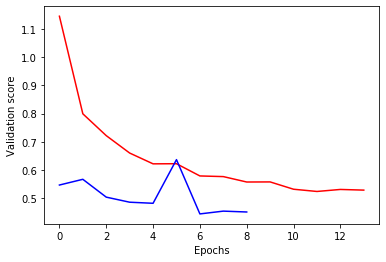

In [176]:
# Defining early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Creating the new model: model_1
model_1 = Sequential()

# Adding the first and second layers
model_1.add(Dense(10, activation='relu', input_shape=input_shape))
model_1.add(Dense(10, activation='relu'))

# Adding the output layer
model_1.add(Dense(2, activation='softmax'))

# Compiling model_1
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Creating the new model: model_2
model_2 = Sequential()

# Adding the first and second layers
model_2.add(Dense(100, activation='relu', input_shape=input_shape))
model_2.add(Dense(100, activation='relu'))

# Adding the output layer
model_2.add(Dense(2, activation='softmax'))

# Compiling model_2
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fitting model_1
model_1_training = model_1.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

# Fitting model_2
model_2_training = model_2.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

# Creating the plot
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()


The blue model is the one we made, the red is the original model. Our model had a lower loss value, so it is the better model. 


###### Adding layers to a network

We've seen how to experiment with wider networks. Here I'll try a deeper network (more hidden layers).

Once again, we have a baseline model called model_1 as a starting point. It has 1 hidden layer, with 50 units. We will create a similar network with 3 hidden layers (still keeping 50 units in each layer).

This will again take a moment to fit both models.

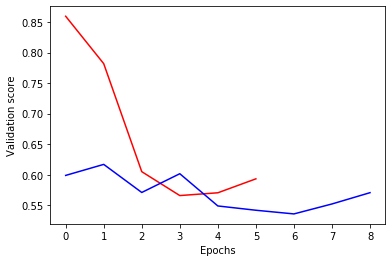

In [180]:
# The input shape to use in the first hidden layer
input_shape = (n_cols,)

# Creating the new model: model_2
model_1 = Sequential()

# Adding the first, second, and third hidden layers
model_1.add(Dense(50, activation='relu', input_shape=input_shape))
model_1.add(Dense(50, activation='relu'))

# Adding the output layer
model_1.add(Dense(2, activation='softmax'))

# Compiling model_2
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Creating the new model: model_2
model_2 = Sequential()

# Adding the first, second, and third hidden layers
model_2.add(Dense(50, activation='relu', input_shape=input_shape))
model_2.add(Dense(50, activation='relu'))
model_2.add(Dense(50, activation='relu'))

# Adding the output layer
model_2.add(Dense(2, activation='softmax'))

# Compiling model_2
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fitting model 1
model_1_training = model_1.fit(predictors, target, epochs=20, validation_split=0.4, callbacks=[early_stopping_monitor], verbose=False)

# Fitting model 2
model_2_training = model_2.fit(predictors, target, epochs=20, validation_split=0.4, callbacks=[early_stopping_monitor], verbose=False)

# Creating the plot
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()


The blue model is the one we made and the red is the original model. The model with the lower loss value is the better model.


###### Experimenting with model structures

We've just run an experiment where we compared two networks that were identical except that the 2nd network had an extra hidden layer. We see that this 2nd network (the deeper network) had better performance. Given that, which of the following would be a good experiment to run next for even better performance?

• Try a new network with fewer layers than anything you have tried yet.

• Use more units in each hidden layer. - correct

• Use fewer units in each hidden layer.


Increasing the number of units in each hidden layer would be a good next step to try achieving even better performance.


##### Thanks a lot for your attention. 